In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import seaborn as sns
from keras.datasets import mnist
from keras import models
from keras.utils import to_categorical
import cv2
import copy
from skimage.transform import resize
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
keras.__version__

'2.10.0'

In [8]:
tr=pd.read_csv("D:\\A.document\\A.opencv\\A.Python\\datasets\\MNIST\\emnist-digits-train.csv",header=None)
tr

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
tr_1=tr.drop(tr.columns[[0]],axis=1)
print(tr_1)

        1    2    3    4    5    6    7    8    9    10   ...  775  776  777  \
0         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
239995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
239999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

        778  779  780  781  782  783  7

In [10]:
tr_1=np.array(tr_1)
tr_2 = tr_1.reshape(tr_1.shape[0], 28, 28,1)
tr_2.shape

(240000, 28, 28, 1)

In [11]:
y_train=tr.iloc[:,0]
print(y_train)

0         8
1         9
2         6
3         3
4         6
         ..
239995    4
239996    2
239997    1
239998    1
239999    0
Name: 0, Length: 240000, dtype: int64


In [12]:
x_train, x_test, y_train, y_test = train_test_split(tr_2, y_train, test_size=0.3,random_state=0)

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(168000, 28, 28, 1) (168000,)
(72000, 28, 28, 1) (72000,)


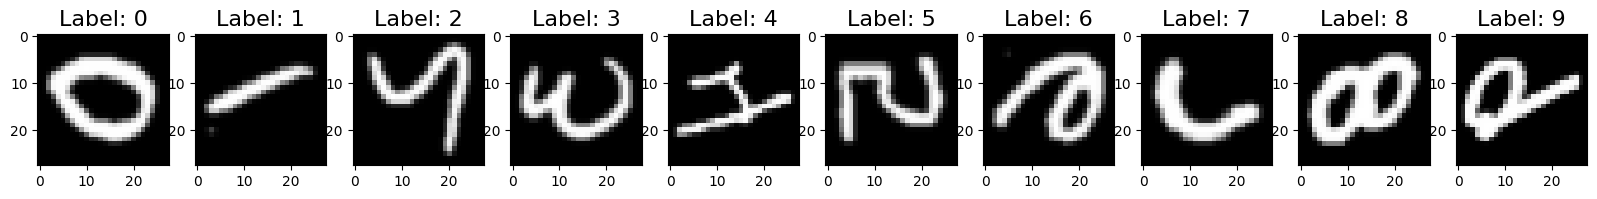

In [14]:
numberOFclasses = 10
f, ax = plt.subplots(1, numberOFclasses, figsize=(20,20))

for i in range(0, numberOFclasses):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

In [15]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, numberOFclasses)
y_test = keras.utils.to_categorical(y_test, numberOFclasses)

x_train shape: (168000, 28, 28, 1, 1)
168000 train samples
72000 test samples


In [60]:
x_test[0].shape

(28, 28, 1)

In [16]:
model = keras.Sequential(
    [
      keras.layers.Conv2D(32,(3,3), activation='relu',padding='same', input_shape = (28,28,1)),
      keras.layers.Conv2D(32,(3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='relu'),
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='relu'),
      keras.layers.Flatten(),
      #keras.layers.Dense(64,activation = 'relu'),
      keras.layers.Dense(10, activation= 'softmax')
    ]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          3

In [18]:
sgd=keras.optimizers.SGD(clipvalue=1.0)
adam=keras.optimizers.Adam(learning_rate=0.01)

model_checkpoint_callback = keras.callbacks.ModelCheckpoint("digits.h5",monitor='val_accuracy',save_best_only=True)
EarlyStopping1=keras.callbacks.EarlyStopping( monitor="val_accuracy",patience=5,restore_best_weights=True)
model.compile(optimizer = adam,loss ='categorical_crossentropy',metrics = ['accuracy'])

In [19]:
history=model.fit(x_train,y_train, epochs=30, batch_size = 64,validation_split=0.1,callbacks=[model_checkpoint_callback,EarlyStopping1])

Epoch 1/30
2363/2363 [==============================] - 18s 5ms/step - loss: 0.0890 - accuracy: 0.9740 - val_loss: 0.0559 - val_accuracy: 0.9838
Epoch 2/30
2363/2363 [==============================] - 12s 5ms/step - loss: 0.0560 - accuracy: 0.9845 - val_loss: 0.0647 - val_accuracy: 0.9823
Epoch 3/30
2363/2363 [==============================] - 12s 5ms/step - loss: 0.0568 - accuracy: 0.9847 - val_loss: 0.0483 - val_accuracy: 0.9847
Epoch 4/30
2363/2363 [==============================] - 12s 5ms/step - loss: 0.0557 - accuracy: 0.9845 - val_loss: 0.0651 - val_accuracy: 0.9814
Epoch 5/30
2363/2363 [==============================] - 12s 5ms/step - loss: 0.0570 - accuracy: 0.9844 - val_loss: 0.0522 - val_accuracy: 0.9840
Epoch 6/30
2363/2363 [==============================] - 12s 5ms/step - loss: 0.0541 - accuracy: 0.9853 - val_loss: 0.0576 - val_accuracy: 0.9843
Epoch 7/30
2363/2363 [==============================] - 12s 5ms/step - loss: 0.0564 - accuracy: 0.9852 - val_loss: 0.0778 - val_ac

In [ ]:
model2=keras.models.load_model("digits.h5")

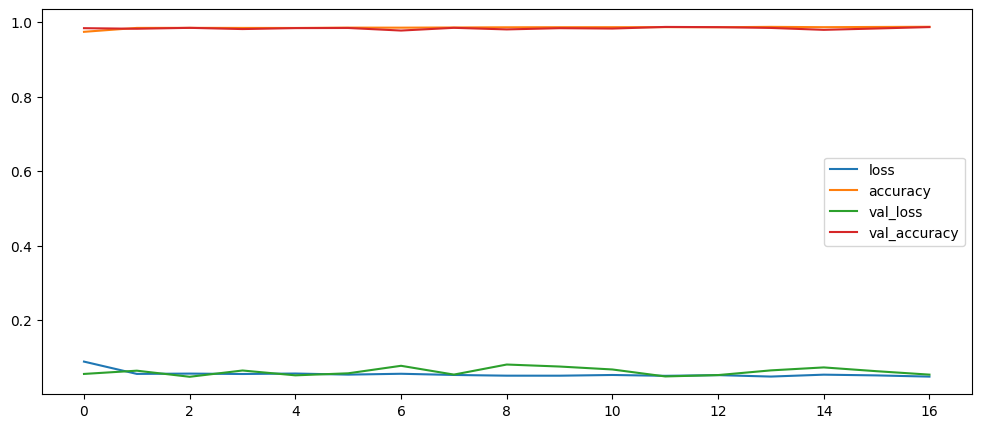

In [20]:
fig,ax = plt.subplots(figsize=(12,5))
ax=plt.plot(history.history["loss"],label="loss")
ax=plt.plot(history.history["accuracy"],label="accuracy")
ax=plt.plot(history.history["val_loss"],label="val_loss")
ax=plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {},Accuracy: {}".format(test_loss, test_acc))

2250/2250 [==============================] - 5s 2ms/step - loss: 0.0512 - accuracy: 0.9876
Loss: 0.05115709453821182,Accuracy: 0.987583339214325


In [44]:
#model1=keras.models.load_model("digits.h5")

In [22]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

2250/2250 [==============================] - 3s 1ms/step
[1 8 6 ... 1 4 1]


In [39]:
x_test.shape

(10000, 28, 28, 1)

47602


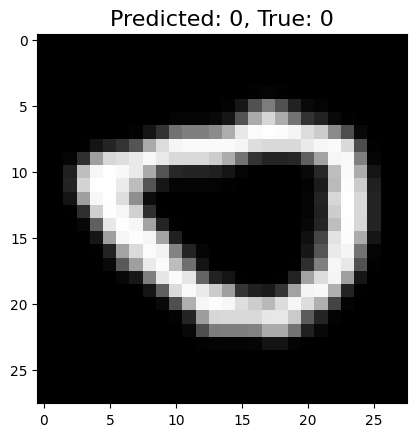

In [26]:
random_idx = np.random.choice(len(x_test))
print(random_idx)
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

(28, 28, 1)


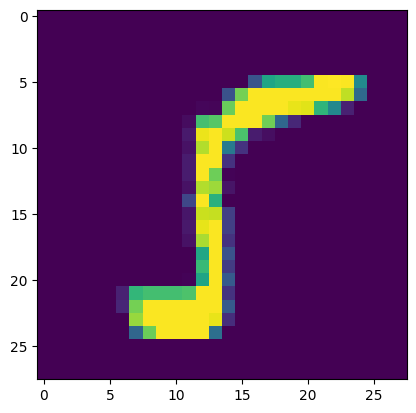

In [41]:
print(x_test[9830].shape)
plt.imshow(x_test[9830])

In [2]:
model1=keras.models.load_model("digits.h5")

1/1 [==============================] - 0s 19ms/step
[5]


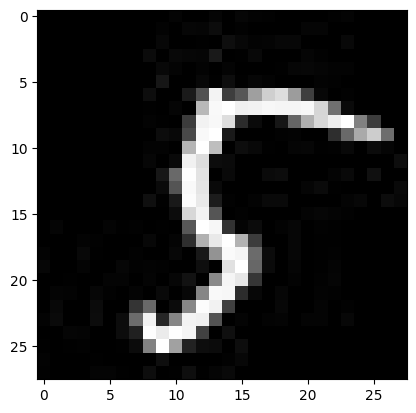

In [5]:
img3_1=load_img('D:\\A.my documents\\A.opencv\\A.Python\\MNIST\\sample\\779.jpg', grayscale=True, target_size=(28, 28))
img3=copy.copy(img3_1)

img = img_to_array(img3)

img = img.reshape(1, 28, 28, 1)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model1.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)
plt.imshow(img3_1, cmap='gray')